# Compton Stopping Power Tests

Module stoppingpower contains routines for numerical integration of stopping powers for incident photons Compton scattering off a $T=0$ Fermi sea of electrons.  No asumptions are made about the incident particle's initial kinematics.   

In [1]:
%matplotlib inline

import time 

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15,20]

import stoppingpower as sp
reload(sp)

<module 'stoppingpower' from 'stoppingpower.pyc'>

### Carbon ion and pion tests

In [2]:
m_electron = 0.5 # MeV
Z_electron = -1.0 # charge
Z_carbon = 6
n_ion = 10**32  # cm^{-3}
n_electron = Z_carbon*n_ion # cm^{-3}, electron number density

Initialize Fermi Sea properties, and construct stopping power functions.  This sets the energy unit to be MeV and the stopping power will be given in MeV/cm.

In [3]:
wd = sp.FermiSea_StoppingPower(m=m_electron, n0=n_electron, 
                               masstolength=sp.MeV_to_InvCM)
wd0 = sp.FermiSea_StoppingPower(m=m_electron, n0=n_electron*10**(-2), 
                               masstolength=sp.MeV_to_InvCM)
dedx_func = wd.get_compton_stopping_power()
dedx0_func = wd0.get_compton_stopping_power()

Stopping power functions accept an (array of) incident kinetic energy and do a monte carlo integral over electron momentum, electron incident direction, and the com scattering angle.  

In [4]:
dedx_func(100.0, samples=1000)

array([[ 76250614.81566514],
       [ 15113753.13739687]])

In [5]:
timeit dedx_func([10.0**-2, 1.0, 100.0, 10**4, 10**6], samples=1000)

1 loop, best of 3: 1.31 s per loop


Timing: 1.3 sec per 5000 samples, $\Rightarrow \sim 3 \cdot 10^{-4}$ sec per sample. 
Need at least $10^5$ samples per incident momentum for percent-level accuracy - thats $30$ seconds per momentum point and about a half hour to construct one stopping power curve.  

In [ ]:
ke_step  = np.logspace(-3, 12, 40)
ke_dense = np.logspace(-6, 13, 15*10**2)
samples = 10**6

try:
    ke.shape
    dedx.shape
    dedx_error.shape
    dedx0.shape
    dedx0_error.shape
    print "appending to previous {} evaluations".format(ke.shape[0])
except NameError:
    ke = np.array([])
    dedx = np.array([])
    dedx_error = np.array([])
    dedx0 = np.array([])
    dedx0_error = np.array([])
    print "starting new run".format(ke.shape[0])

t0 = time.time()
dedx_step, dedx_error_step = dedx_func(ke_step, samples=samples)
print "finished in {:0.2f} minutes".format((time.time() - t0)/60.0)
dedx = np.concatenate((dedx, dedx_step))
dedx_error = np.concatenate((dedx_error, dedx_error_step))

t1 = time.time()
dedx0_step, dedx0_error_step = dedx0_func(ke_step, samples=samples)
print "finished in {:0.2f} minutes".format((time.time() - t1)/60.0)
dedx0 = np.concatenate((dedx0, dedx0_step))
dedx0_error = np.concatenate((dedx0_error, dedx0_error_step))

ke = np.concatenate((ke, ke_step))

# save results
name = "ni_1032"
np.savetxt("dedx_compton_{}.txt".format(name), 
            np.concatenate(([ke], [dedx], [dedx_error])).T)
name = "ni_1030"
np.savetxt("dedx_compton_{}.txt".format(name), 
            np.concatenate(([ke], [dedx0], [dedx0_error])).T)

starting new run
finished in 96.12 minutes


stoppingpower can also construct an approximate function...

In [ ]:
dedx_approx_func = wd.get_compton_piecewise()
dedx0_approx_func = wd0.get_compton_piecewise()

In [ ]:
fig, ax = plt.subplots()

# numerical results 
ax.errorbar(ke, dedx, yerr=dedx_error, 
            alpha=0.8, marker='.', linestyle='', color='r', 
            label='numerical, 10^32')
ax.errorbar(ke, dedx0, yerr=dedx0_error, 
            alpha=0.8, marker='.', linestyle='', color='b', 
            label='numerical, 10^30')

# limiting approximations
ax.plot(ke_dense, dedx_approx_func(ke_dense), alpha=0.3,
        marker='', linestyle='-', color='m', 
        label='approx, 10^32')
ax.plot(ke_dense, dedx0_approx_func(ke_dense), alpha=0.3,
        marker='', linestyle='-', color='c', 
        label='approx, 10^30')

# energy scales 
ax.axvline(wd.KEfermi, linestyle=':', color='r', alpha=0.5, 
           label="Fermi energy, 10^32")
ax.axvline(wd0.KEfermi, linestyle=':', color='b', alpha=0.5, 
           label="Fermi energy, 10^30")

ax.set_xlabel("incident kinetic energy [MeV]")
ax.set_ylabel("stopping power [MeV/cm]")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim([10**-1, 10**11])
ax.legend(loc="best")

/home/rjanish/installs/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:4: RuntimeWarning: divide by zero encountered in divide
/home/rjanish/installs/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: RuntimeWarning: invalid value encountered in divide


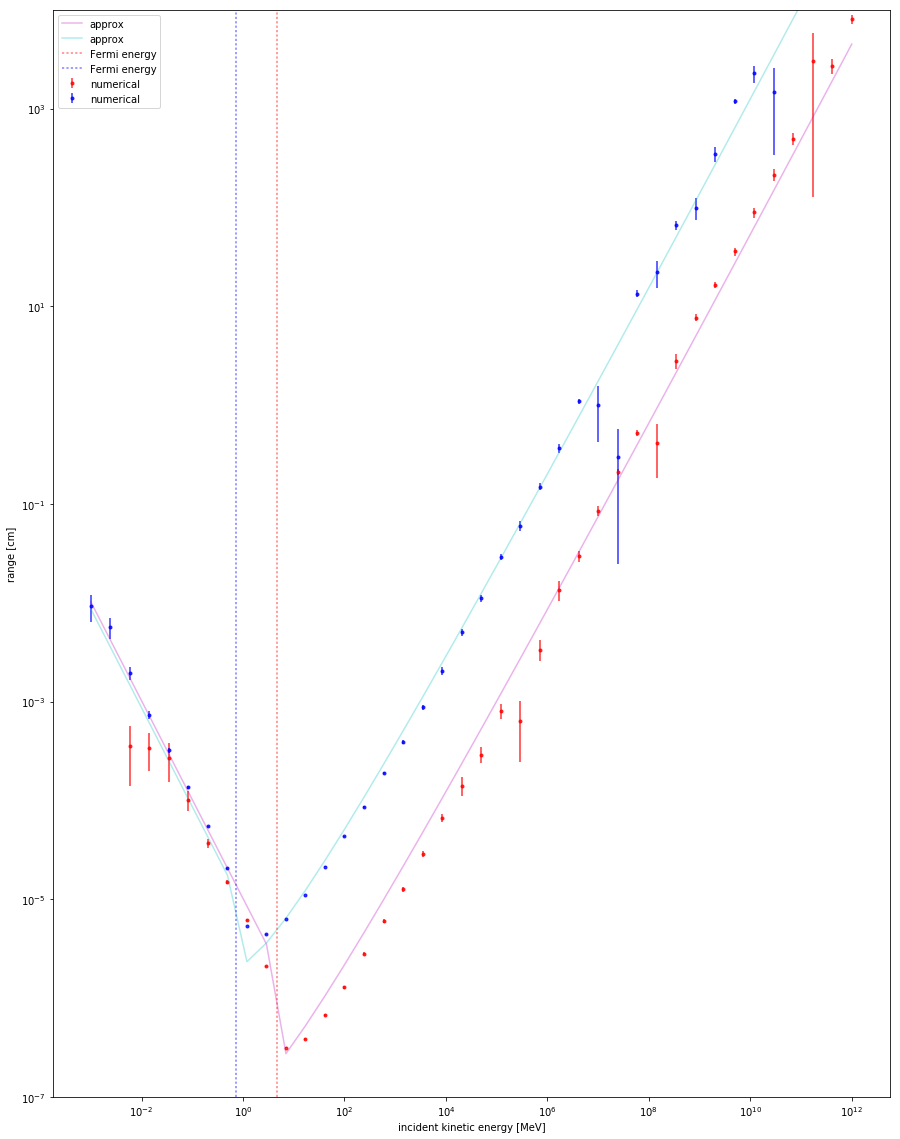

In [9]:
fig, ax = plt.subplots()

# numerical results 
ax.errorbar(ke, ke/dedx, 
            yerr=ke*dedx_error/(dedx**2), 
            alpha=0.8, marker='.', linestyle='', color='r', 
            label='numerical')
ax.errorbar(ke, ke/dedx0, 
            yerr=ke*dedx0_error/(dedx0**2), 
            alpha=0.8, marker='.', linestyle='', color='b', 
            label='numerical')

# limiting approximations
ax.plot(ke, ke/dedx_approx_func(ke), alpha=0.3,
        marker='', linestyle='-', color='m', 
        label='approx')
ax.plot(ke, ke/dedx0_approx_func(ke), alpha=0.3,
        marker='', linestyle='-', color='c', 
        label='approx')

# energy scales 
ax.axvline(wd.KEfermi, linestyle=':', color='r', alpha=0.5, 
           label="Fermi energy")
ax.axvline(wd0.KEfermi, linestyle=':', color='b', alpha=0.5, 
           label="Fermi energy")

ax.set_xlabel("incident kinetic energy [MeV]")
ax.set_ylabel("range [cm]")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim([10**-7, 10**4])
ax.legend(loc="best")